<a href="https://colab.research.google.com/github/lvbnhbq12092002/rheh/blob/main/02prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1. Аналитическое (выполняется в тетради)

###1.1 Решите задачу Коши для ДУ с разделяющимися переменными:

1. $y'=2x^2y^2$, $y(1)=1$ 
2. $y'=-x^3y^2$, $y(1)=2$ 
3. $y'=3xy^2$, $y(1)=3$ 
4. $y'=4y^2/x^2$, $y(1)=1$ 
5. $y'=-4xy^2$, $y(1)=2$ 
6. $y'=-3\sqrt{x}y^2$, $y(1)=3$ 
7. $y'=-y^2/\sqrt{x}$, $y(1)=4$ 
8. $y'=-\sqrt{x^3}y^2$, $y(1)=4$ 
9. $y'=y^2/x^3$, $y(1)=2$ 
10. $y'=5\sqrt[3]{x}y^2$, $y(1)=2$ 
11. $y'=4x^4y^2$, $y(1)=1$ 
12. $y'=-\sqrt[4]{x}y^2$, $y(1)=5$ 

###1.2 Решите дифференциальное уравнение с разделяющимися переменными:

1. $(x^2+2)y^2dy=-xdx$
2. $(x-2)(3y-4)dy=(-3x+1)(y-3)dx$
3. $(2x-1)(y-2)dx=(x-2)(3y+1)dy$
4. $(2x-3)(y^2+3)dx=2y^2dy$
5. $(x^2-1)yy'=(x^2-3)(2y-1)$ 
6. $(3x-2)y'=-3x(3y-1)$
7. $(x+1)(y+1)y'=(x^2+1)y$
8. $2xdy=(x^2-1)(y^2+3)dx$
9. $2xdy=(x^2-1)(y^2+3)dx$
10. $3(-3y+4)y'=(-2x+3)(2y-3)$
11. $x^2ydx=(x^2-2)dy$
12. $x(y^2-3)dx=-3x(y^2-1)dy$


###1.3 Решите начальную задачу для простейшего ДУ с параметром $a$:

1. $y'=ax$, $y(1)=0$ 
2. $y'=ax^2$, $y(-1)=1$ 
3. $y'=1-ax$, $y(2)=0$ 
4. $y'=x^2-ax$, $y(-2)=0$ 
5. $y'=x+ax^2$, $y(1)=-1$ 
6. $y'=a+x$, $y(-1)=1$ 
7. $y'=a+x^2$, $y(3)=2$ 
8. $y'=1+ax-x^2$, $y(-3)=0$ 
9. $y'=(x-a)^2$, $y(1)=0$ 
10. $y'=a^2-ax$, $y(-1)=1$ 
11. $y'=a-a^2x$, $y(2)=2$ 
12. $y'=a+x+ax^2$, $y(-2)=0$


##Задание 2. Решение дифференциальных уравнений в SymPy

###Пример оформления решения

Подключаем пакеты Python.

In [1]:
from sympy import * # пакет символьных вычислений
import numpy as np # пакет для работы с многомерными массивами

Создаем символы (переменные).

In [2]:
x, C1 = symbols("x C1")

Для решения дифференциальных уравнений в SymPy для неизвестной функции нужно создать свою собственную переменную с помощью команды Function (аналогично созданию простой переменной).

In [3]:
y = Function('y')
y(x)

y(x)

Удобно сразу создать специальную переменную, обозначающую производную неизвестной функции по заданной переменной.

In [4]:
y_ = Derivative(y(x), x)
y_

Derivative(y(x), x)

Создаем дифференциальное уравнение $$xdy=(x+1)ydx.$$ Вручную надо поделить обе части на $dx$ и заменить $dy/dx$ на $y'$: $$xy'=(x+1)y.$$ При создании ДУ в SymPy неизвестную функцию надо указывать вместе с переменной: $y(x)$.

In [51]:
eq = Eq(y_, (y(x))**2 / x**3)
eq

Eq(Derivative(y(x), x), y(x)**2/x**3)

Дифференциальные уравнения решаются с помощью команды dsolve. Если не указывать начальные условия, то команда выдает общее решение ДУ.

In [52]:
sol = dsolve(eq)
sol

Eq(y(x), -2*x**2/(C1*x**2 - 1))

Чтобы решить начальную задачу (задачу Коши) с начальным условием $y(x_0)=y_0$, надо в команде dsolve указать опциональный параметр ics = {y(x0): x0}. 

Решим наше ДУ с начальным условием $y(1/2)=2$. 

Рациональные числа в SymPy задаются командой Rational(n, m).

In [53]:
x0 = 1
y0 = 2
sol1 = dsolve(eq, ics={y(x0): y0})
sol1

Eq(y(x), 2*x**2)

Построим семейство интегральных кривых общего решения и решение начальной задачи на одном графике. 

Для извлечения собственно функции из выражения вида $y(x)=x^2$ надо использовать атрибут rhs (right hand side, и это не метод - скобки не нужны!). 

Для выделения графика цветом нужно задать цвет опциональным параметром line_color.

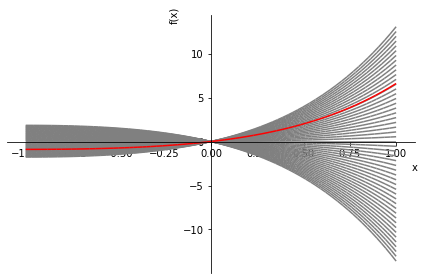

In [ ]:
p = plot(show=False) # создаем пустой график
for c in np.arange(-5, 5, 0.2): # цикл по значениям константы C1 - семейство интегральных кривых
  f = sol.subs(C1, c).rhs # подставляем c вместо C1 и запоминаем в f правую часть
  p.extend(plot(f, (x, -1, 1), line_color="gray", show=False))
p.extend(plot(sol1.rhs, (x, -1, 1), line_color="red", show=False)) # решение начальной задачи
p.show()

SymPy всегда старается решить ДУ в явной форме. В некоторых случаях это или невозможно, или сильно усложняет ответ (например, получается несколько решений из-за операции извлечения квадратного корня). Чтобы решить ДУ в неявной форме надо в команде dsolve указать опцию simplify=False. 

In [13]:
eq = Eq(y(x) * y_, x + 1)
sol = dsolve(eq) # решение в явной форме => список из двух решений
sol 

[Eq(y(x), -sqrt(C1 + x**2 + 2*x)), Eq(y(x), sqrt(C1 + x**2 + 2*x))]

In [19]:
sol = dsolve(eq, simplify=False) # решение в неявной форме => одно выражение
sol

Eq(-1/y(x), C1 + 2*x**3/3)

График неявной функции (как в последнем примере) в SymPy строится командой plot_implicit(eq). Но, для этого выражение eq должно содержать две переменные, а не переменную и функцию, как у нас. Поэтому, предварительно надо заменить в найденном решении функцию y(x) на переменную с тем же именем.  

In [17]:
Y = symbols("y") # создали новую переменную, которая на печати будет выглядеть, как и имя нашей функции
Y

y

In [18]:
sol1 = sol.subs(y(x), Y) # заменяем y(x) на y
sol1

Eq(y, -3/(C1 + 2*x**3))

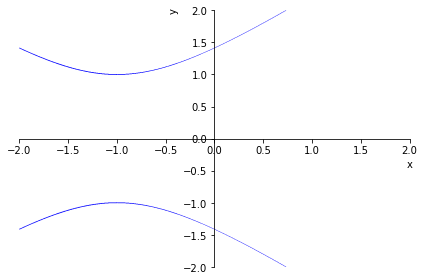

In [ ]:
sol2 = sol1.subs(C1, 1) # заменили C1 на 1, получили частное решение
p = plot_implicit(sol2, (x, -2, 2), (Y, -2, 2)) # вместо y указываем Y (имя переменной в Python!)

Построим семейство кривых общего решения.

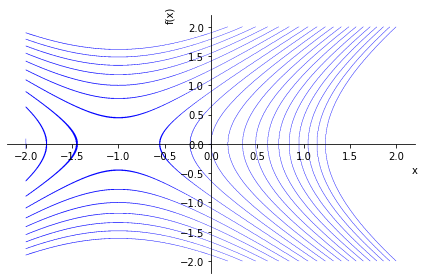

In [ ]:
p = plot(show=False) # пустой график
for c in np.arange(-2, 2, 0.2): # цикл по константе C1
  p1 = plot_implicit(sol1.subs(C1, c), (x, -2, 2), (Y, -2, 2), show=False) # неявный график новой кривой
  p.extend(p1) 
p.show()

### Задание в SymPy


1. Найдите общее решение ДУ и решение начальной задачи из упражнения 1 аналитической части, постройте на одном графике семейство интегральных кривых общего решения и (другим цветом) решение начальной задачи:

In [ ]:
'''
1) y=-3/(-7/2+2x^3)
2) y=4/(x^4+1)
3) y=-2/(3x^2-11/3)
4) y=x
5) y=1/(2x^2-3/2)
6) y=1/(2x^2-5/3)
7) y=-1/(5/3-2*x^1/2)
8) y=5/(2x*x^3/2-3/4)
9) y=2x^2
'''
​


2. Решите в *неявной форме* дифференциальное уравнение из упражнения 2 аналитической части, постройте семейство интегральных кривых в неявной форме для разных значений константы $C$: 

3. Решите начальную задачу из упражнения 3 аналитической части, постройте семейство интегральных кривых для разных значений параметра $a$:

## Задание 3. Водяные часы

Рассматривается модель вытекания жидкости из сосуда, имеющего форму усеченного конуса высоты $H$ с радиусами нижнего и верхнего оснований $a$ и $b$.

![](https://drive.google.com/uc?export=view&id=1S8HCDWCtEIpXlbap037HiAlKaj-n19wD)







Определяем символы $t$ - время; $a$, $b$, $H$ - размеры сосуда; $r$ - радиус сечения; $\sigma$ - площадь отверстия; $g$ - ускорение свободного падения.

In [ ]:
t, a, b, H, r, sigma, g = 

Определяем функцию $h(t)$ и ее производную $dh/dt$.

In [ ]:
h = 
h_ = 

Строим соотношение, связывающее радиус $r$ сечения сосуда с его высотой $h(t)$ - уравнение прямой, проходящей через две заданные точки $(a, 0)$ и $(b, H)$. 

In [ ]:
eq = 
eq # показываем полученное соотношение

Выражаем из этого соотношения $r$ через $h(t)$.

In [ ]:
r = 
r # показываем найденную зависимость

Находим площадь сечения $S$ на высоте $h(t)$.

In [ ]:
S = 
S # показываем полученное выражение

Составляем дифференциальное уравнение $$S(h(t))\frac{dh(t)}{dt}=-\sigma\sqrt{2gh(t)}.$$

In [ ]:
de = 
de # показываем ДУ

Определяем начальное условие $h(0)=H$.

In [ ]:
ic = 
ic 

Решаем построенную начальную задачу в неявной форме.

In [ ]:
sol = 
sol # показываем найденное решение

Подставляем в найденное решение числовые значения всех параметров: $\sigma=0.01$, $g=9.8$, размеры сосуда ($a$, $b$ и $H$):


1. $H=2$, $a=2$, $b=1$ 
2. $H=4$, $a=3$, $b=1$
3. $H=1$, $a=4$, $b=1$
4. $H=2$, $a=4$, $b=2$
5. $H=5$, $a=3$, $b=1$
6. $H=3$, $a=2$, $b=1$ 
7. $H=4$, $a=3$, $b=2$ 
8. $H=4$, $a=5$, $b=1$
9. $H=2$, $a=4$, $b=3$
10. $H=1$, $a=5$, $b=4$
11. $H=2$, $a=3$, $b=1$
12. $H=3$, $a=3$, $b=2$


In [ ]:
my_sol = 
my_sol # показываем полученное решение

Находим момент времени $T$ полного опустошения сосуда, подставляя в найденное решение $h(t)=0$ и решая полученное соотношение относительно $t$.

In [ ]:
T = 
T # показываем найденное время

Строим график изменения высоты от времени (в неявной форме) в пределах $t\in[0, T]$, $h\in[0, H]$. Для этого надо заменить в решении функцию $h(t)$ на символ $h$ (см. пример с графиком неявной функции выше).